In [1]:
import pybaseball as pyb
import pandas as pd

# Statcast data

In [ ]:
help(pyb.statcast_batter)

In [15]:
pyb.playerid_lookup("Henderson", "Gunnar")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,henderson,gunnar,683002,hendg002,hendegu01,26289,2022.0,2024.0


In [6]:
gh=pyb.statcast_batter(player_id = 683002,start_dt="2024-03-28",end_dt = "2024-06-04")

Gathering Player Data


In [8]:
gh.to_csv("gunnar_statcast.csv",index=False)

In [14]:
gh.head(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,CU,2024-06-04,74.3,-1.94,5.94,"Henderson, Gunnar",683002,670102,double,hit_into_play,...,0,4,0,Infield shade,Standard,40,-0.014,0.418,79.536414,7.90328
1,FF,2024-06-04,94.0,-2.01,5.96,"Henderson, Gunnar",683002,670102,NaN,called_strike,...,0,4,0,Infield shade,Standard,203,0.000,-0.029,NaN,NaN
2,CU,2024-06-04,72.9,-2.01,5.92,"Henderson, Gunnar",683002,670102,NaN,ball,...,0,4,0,Infield shade,Standard,42,0.000,0.025,NaN,NaN
3,FF,2024-06-04,96.9,-2.03,5.39,"Henderson, Gunnar",683002,663878,strikeout,foul_tip,...,1,10,1,Infield shade,Standard,214,0.000,-0.401,82.009834,6.86528
4,FF,2024-06-04,98.6,-1.97,5.38,"Henderson, Gunnar",683002,663878,NaN,foul,...,1,10,1,Infield shade,Standard,212,0.000,0.000,76.418900,6.94459


In [18]:
gh['events'].value_counts().sum()

267

In [ ]:
help(pyb.pitching_stats_bref)

In [ ]:
## get all of this season's hitting and pitching data so far, big, big file
# pf = pyb.pitching_stats_bref()
# bf = pyb.batting_stats(2024,qual=10)

In [ ]:
#print(pf[pf['Name']=='James McArthur'])

In [ ]:
#print(list(df.sort_values(by='CSW%',ascending=False)['Name']))

## Scrape Data from fangraphs

In [3]:
def add_DMB(df,type="B",key="key_MLB",leagues = ['RJML','SSBL','CJPL']):
    ''' add team affiliations in DMB league(s) to a data frame containing type ("B" or "P") of player, by certain player key''' 
    import pandas as pd
    keyID = pd.read_csv("csv/keyID.csv")
    df = df.merge(keyID[keyID['type']==type][['type','key_MLB','key_FG','key_bbref']+leagues],on=key,how='left')
    return(df)

In [4]:
keyID = pd.read_csv("csv/keyID.csv")

In [2]:
hit = pyb.fg_batting_data(start_season=2024,qual=10)
pit = pyb.fg_pitching_data(start_season=2024,qual=10)
hit = hit.rename(columns={"IDfg": "key_FG"})
pit = pit.rename(columns={"IDfg": "key_FG"})

In [7]:
hit24 = add_DMB(hit,type="B",key="key_FG")
pit24 = add_DMB(pit,type="P",key="key_FG")
pit24['AB'] = round(pit24['H']/pit24['AVG'],0).astype(int)
hit24['O'] = hit24['H']+hit24['2B']+2*hit24['3B']+2*hit24['HR']+hit24['BB']+hit24['SB']+hit24['SH']+hit24['R'] + hit24['RBI']-hit24['CS']-hit24['GDP']

In [15]:
list(pit24.columns)

['key_FG',
 'Season',
 'Name',
 'Team',
 'Age',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'Relieving',
 'Relief-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB% 2',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone

In [17]:
pit24[['Name','IP','TBF','H','AVG','AB','xFIP','CSW%','RJML','SSBL']].head(50)

KeyError: "['IP', 'TBF'] not in index"

## Team Totals

In [18]:
hit_count_stats = ['PA','AB','H','BB','HBP','SF','2B','3B','HR','R','RBI','SB','CS','SH','SO','GDP','O','WAR','Def','BsR']

In [19]:
def hit_rate_stats(df):
    df['avg'] = round(df['H']/df['AB'],3)
    df['obp'] = round((df['H']+df['BB']+df['HBP'])/(df['AB']+df['BB']+df['HBP']+df['SF']),3)
    df['slg'] = round((df['H']+df['2B']+2*df['3B']+3*df['HR'])/df['AB'],3)
    df['ops'] = df['obp']+df['slg']
    df['babip'] = round((df['H']-df['HR'])/(df['AB']-df['HR']-df['SO']+df['SF']),3)
    df['kpct'] = round(df['SO']/df['PA']*100,1)
    df['bbpct'] = round(df['BB']/df['PA']*100,1)
    return(df)

In [20]:
RJML_hit = hit_rate_stats(hit24[['RJML']+hit_count_stats].groupby('RJML').sum())
SSBL_hit = hit_rate_stats(hit24[['SSBL']+hit_count_stats].groupby('SSBL').sum())

In [22]:
RJML_hit[['PA','O','HR','R','RBI','avg','obp','slg','ops','WAR','Def','BsR']].sort_values('ops',ascending=False)

,PA,O,HR,R,RBI,avg,obp,slg,ops,WAR,Def,BsR
RJML,,,,,,,,,,,,
HOM,2955,1962,110,347,362,0.248,0.321,0.429,0.750,12.2,-22.4,-7.9
RAM,2622,1752,87,325,314,0.255,0.318,0.424,0.742,11.7,-8.1,-0.3
RAC,2323,1623,53,315,287,0.274,0.327,0.412,0.739,14.9,26.8,12.4
HIG,2302,1530,70,276,273,0.254,0.326,0.411,0.737,11.4,-2.2,4.4
ALA,2813,1876,89,358,340,0.242,0.322,0.413,0.735,10.6,-25.1,-4.2
DV,2564,1702,83,309,294,0.247,0.319,0.415,0.734,10.3,-9.0,-2.0
GNB,2538,1713,86,297,327,0.232,0.319,0.413,0.732,10.6,-20.3,4.8
SV,3719,2392,98,439,413,0.261,0.326,0.402,0.728,17.4,6.9,4.3
CAM,2490,1606,76,276,282,0.242,0.320,0.406,0.726,9.2,-11.6,-1.7


In [23]:
pit_count_stats = ['G','GS','W','L','SV','IP','TBF','AB','H','R','ER','HR','BB','HBP','WP','BK','SO','Pitches','Balls','Strikes','WAR']

In [24]:
def pit_rate_stats(df):
    import numpy as np
    df['Inn'] = np.floor(df['IP'])+10*(df['IP']-np.floor(df['IP']))/3
    df['avg'] = round(df['H']/df['AB'],3)
    df['whip'] = round((df['H']+df['BB'])/df['Inn'],2)
    df['era'] = round(df['ER']/df['Inn']*9,2)
    df['hr/9'] = round(df['HR']/df['Inn']*9,1)
    df['kpct'] = round(df['SO']/df['TBF']*100,1)
    df['bbpct'] = round(df['BB']/df['TBF']*100,1)
    return(df)

In [25]:
RJML_pit = pit_rate_stats(pit24[['RJML']+pit_count_stats].groupby('RJML').sum())
SSBL_pit = pit_rate_stats(pit24[['SSBL']+pit_count_stats].groupby('SSBL').sum())

In [26]:
RJML_pit[['GS','TBF','W','L','SV','kpct','bbpct','hr/9','avg','whip','era','WAR']].sort_values(by=['whip','kpct'],ascending=[True,False])

,GS,TBF,W,L,SV,kpct,bbpct,hr/9,avg,whip,era,WAR
RJML,,,,,,,,,,,,
DAY,47,1936,37,19,40,24.2,7.9,0.8,0.198,1.03,2.57,8.0
RAM,45,1914,31,23,15,24.9,7.8,0.8,0.215,1.12,3.00,8.7
VAN,90,2867,50,33,38,24.8,8.0,1.0,0.217,1.14,3.66,10.0
HAL,53,2065,33,30,20,24.6,7.2,0.9,0.228,1.16,3.63,7.3
CC,68,2151,31,28,9,21.9,6.5,1.1,0.232,1.16,3.82,6.2
GNB,65,2191,35,31,3,22.7,5.8,1.2,0.240,1.17,4.12,6.8
TB,36,1665,22,20,35,26.4,9.1,0.9,0.218,1.19,2.97,5.5
GRF,75,2344,34,35,34,23.9,7.7,1.0,0.228,1.19,3.83,7.9
DV,40,1588,24,22,27,22.5,8.2,0.9,0.224,1.19,3.40,4.2


## My Hitters and Pitchers

In [31]:
hit_summary_cols = ['Name','PA','O','2B','HR','R','RBI','SB','BB','SO','xwOBA','wRC+','WAR','Bat','Fld','BsR','AVG','OBP','SLG','OPS','BABIP']
hit_van = hit24[hit24['RJML']=="VAN"][hit_summary_cols].sort_values(by=['WAR'],ascending=False)
hit_nb = hit24[hit24['SSBL']=="NB"][hit_summary_cols].sort_values(by=['WAR'],ascending=False)
hit_obs = hit24[hit24['CJPL']=="OBS"][hit_summary_cols].sort_values(by=['WAR'],ascending=False)

In [34]:
display(hit_nb[['Name','PA','O','2B','HR','R','RBI','SB','AVG','OBP',"SLG",'OPS','xwOBA','wRC+','WAR','Fld','BsR']].sort_values('O',ascending=False))

,Name,PA,O,2B,HR,R,RBI,SB,AVG,OBP,SLG,OPS,xwOBA,wRC+,WAR,Fld,BsR
3,Gunnar Henderson,272,246,8,19,47,42,8,0.264,0.368,0.580,0.948,0.399,168,3.8,1.7,2.1
37,Corey Seager,250,177,5,13,29,30,0,0.271,0.360,0.472,0.832,0.394,130,1.8,1.2,-2.7
12,Isaac Paredes,248,177,13,10,27,37,0,0.298,0.383,0.498,0.881,0.310,155,2.4,-1.0,-0.5
57,Jose Altuve,275,176,12,9,35,21,8,0.287,0.342,0.441,0.783,0.313,125,1.5,-1.8,-1.0
290,Bryan De La Cruz,264,158,9,10,29,27,1,0.244,0.299,0.405,0.704,0.340,99,0.1,-1.6,-1.3
286,Josh Bell,263,151,12,6,26,30,0,0.255,0.324,0.391,0.716,0.306,105,0.1,-2.2,-1.6
75,Luis Rengifo,175,133,9,4,24,18,14,0.327,0.374,0.469,0.843,0.302,140,1.2,-3.4,0.7
188,Logan O'Hoppe,201,129,6,7,24,26,0,0.254,0.310,0.411,0.721,0.340,105,0.5,-5.5,-0.6
243,Brayan Rocchio,187,101,9,0,26,9,7,0.201,0.306,0.258,0.564,0.289,72,0.3,1.4,-0.6
103,Mike Trout,126,101,1,10,17,14,6,0.220,0.325,0.541,0.867,0.407,140,1.0,-1.3,1.2


In [40]:
pit_summary_cols = ['Name','G','GS','TBF','IP','H','BB','SO','HR','WHIP','ERA','xFIP','AVG','BABIP','K%','BB%','HR/9','CSW%','WAR','Stuff+']
pit_van = pit24[pit24['RJML']=="VAN"][pit_summary_cols].sort_values(by=['WAR'],ascending=False)
pit_nb = pit24[pit24['SSBL']=="NB"][pit_summary_cols].sort_values(by=['WAR'],ascending=False)
pit_obs = pit24[pit24['CJPL']=="OBS"][pit_summary_cols].sort_values(by=['WAR'],ascending=False)

In [41]:
pit_van.sort_values(by=['WAR'],ascending=False)

,Name,G,GS,TBF,IP,H,BB,SO,HR,WHIP,ERA,xFIP,AVG,BABIP,K%,BB%,HR/9,CSW%,WAR,Stuff+
10,Dylan Cease,13,13,305,77.0,52,22,93,8,0.96,3.51,3.26,0.184,0.243,0.305,0.072,0.94,0.299,1.9,121
17,Yusei Kikuchi,12,12,278,66.1,69,14,65,6,1.25,3.66,3.34,0.261,0.326,0.234,0.050,0.81,0.284,1.8,108
28,Max Fried,12,12,290,73.2,53,22,67,5,1.02,2.93,3.10,0.200,0.249,0.231,0.076,0.61,0.274,1.5,98
50,Mason Miller,21,0,105,27.2,14,11,52,2,0.90,2.28,1.44,0.149,0.300,0.495,0.105,0.65,0.384,1.2,151
64,Ryan Pepiot,10,10,204,52.1,34,16,59,6,0.96,3.96,3.66,0.183,0.231,0.289,0.078,1.03,0.294,1.0,117
100,Cody Bradford,3,3,71,19.1,10,2,17,1,0.62,1.40,3.95,0.145,0.176,0.239,0.028,0.47,0.285,0.7,92
141,Garrett Cleavinger,27,0,107,25.2,16,15,33,0,1.21,1.40,3.60,0.180,0.286,0.308,0.140,0.00,0.294,0.5,117
143,Kyle Gibson,12,12,293,70.2,59,28,60,9,1.23,3.69,4.07,0.224,0.258,0.205,0.096,1.15,0.284,0.5,93
161,Brayan Bello,10,10,228,53.2,49,18,49,8,1.25,4.36,3.51,0.237,0.273,0.215,0.079,1.34,0.279,0.4,104
164,Miles Mikolas,13,13,297,71.0,77,14,53,12,1.28,5.32,3.99,0.274,0.301,0.178,0.047,1.52,0.271,0.4,90


In [42]:
pit24.sort_values(by=['CSW%'],ascending=False)[['RJML','Name','Team','TBF','WAR','xFIP','CSW%','Stuff+','Location+','Pitching+']].head(20)

,RJML,Name,Team,TBF,WAR,xFIP,CSW%,Stuff+,Location+,Pitching+
50,VAN,Mason Miller,OAK,105,1.2,1.44,0.384,151,103,108
80,DAY,Shane Bieber,CLE,45,0.8,0.52,0.355,97,102,100
70,NaN,Cade Smith,CLE,103,0.9,2.10,0.353,124,103,108
208,NaN,Dedniel Nunez,NYM,45,0.3,1.74,0.352,126,102,107
41,HAL,Fernando Cruz,CIN,116,1.3,1.86,0.349,118,97,103
71,CAM,Griffin Jax,MIN,98,0.9,2.36,0.348,137,103,116
109,HAR,David Robertson,TEX,114,0.7,2.53,0.347,118,97,102
82,RAM,Andres Munoz,SEA,101,0.8,2.38,0.347,115,98,103
276,VAN,James McArthur,KCR,108,0.1,3.14,0.344,106,100,106
11,TB,Jack Flaherty,DET,281,1.9,2.10,0.341,97,104,104


In [43]:
import matplotlib.pyplot as plt
import numpy as np

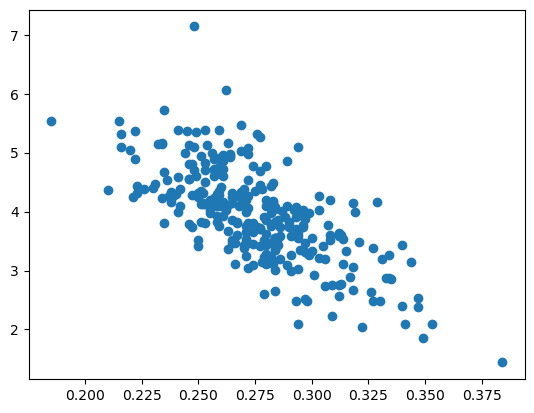

In [44]:
xpoints = pit[pit['TBF']>=100]['CSW%']
ypoints = pit[pit['TBF']>=100]['xFIP']
plt.plot(xpoints, ypoints,'o')
plt.show()

In [45]:
import seaborn as sns

In [46]:
van_hit_names = hit24[(hit24['RJML']=="VAN")]['Name'].tolist()
van_pit_names = pit24[(pit24['RJML']=="VAN")]['Name'].tolist()
nb_hit_names = hit24[(hit24['SSBL'] == "NB")]['Name'].tolist()
nb_pit_names = pit24[(pit24['SSBL'] == "NB")]['Name'].tolist()

In [47]:
def my_pit(name):
    if name in nb_pit_names:
        return "nb"
    if name in van_pit_names:
        return "van"
    else:
        return "nope"

In [48]:
pit24['my_guy'] = pit24['Name'].apply(my_pit)

<Axes: xlabel='CSW%', ylabel='xFIP'>

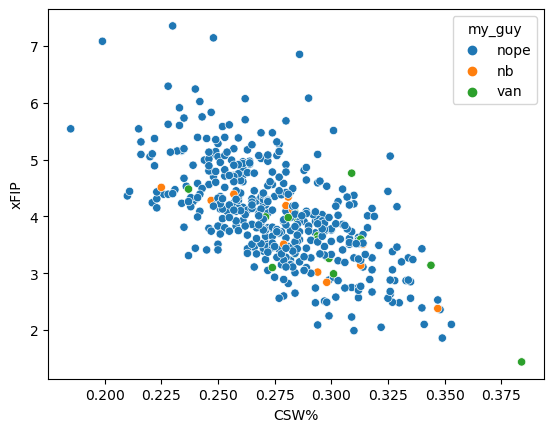

In [49]:
sns.scatterplot(data=pit24[pit24['TBF']>=50],x='CSW%',y='xFIP',hue='my_guy')

In [50]:
def my_hit(name):
    if name in nb_hit_names:
        return "nb"
    if name in van_hit_names:
        return "van"
    else:
        return "nope"

In [51]:
hit24['my_guy'] = hit24['Name'].apply(my_hit)

In [52]:
hit24['my_guy'].value_counts()

my_guy
nope    459
nb       18
van      17
Name: count, dtype: int64

<Axes: xlabel='xwOBA', ylabel='wRC+'>

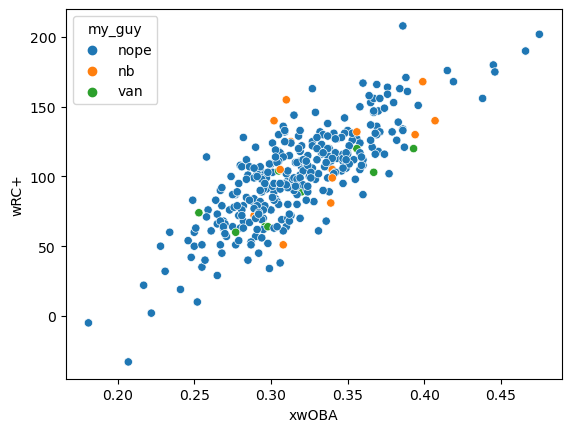

In [53]:
sns.scatterplot(data=hit24[hit24['PA']>=90],x='xwOBA',y='wRC+',hue='my_guy')